<p align="center">
  <img src="https://user-images.githubusercontent.com/14334509/179359809-bd45566a-486d-418f-83fa-67bbbba8c45c.png" height=120>
</p>

# CodeFormer Inference
## Credit (NeurIPS 2022)
Shangchen Zhou, Kelvin C.K. Chan, Chongyi Li, Chen Change Loy

[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer) [![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2206.11253) [![Hugging Face](https://img.shields.io/badge/Demo-%F0%9F%A4%97%20Hugging%20Face-blue)](https://huggingface.co/spaces/sczhou/CodeFormer) ![visitors](https://visitor-badge.glitch.me/badge?page_id=sczhou/CodeFormer)<br>
[original colab](https://colab.research.google.com/drive/1m52PNveE4PBhYrecj34cnpEeiHcC5LTb?usp=sharing) <br>
[github source code](https://github.com/sczhou/CodeFormer)


In [4]:
#@title <-- Tap this if you play on Mobile { display-mode: "form" }


%%html
<b>Press play on the music player to keep the tab alive, then run the cell below</b><br/>
<audio src="https://raw.githubusercontent.com/KoboldAI/KoboldAI-Client/main/colab/silence.m4a" controls>

In [6]:
#@title Mount Google Drive for Bulk image Upload
from google.colab import drive
import os
drive.mount("/content/gdrive", force_remount=True)
drive_input_folder = "/content/gdrive/MyDrive/upload"
if os.path.exists(drive_input_folder):
    print("The folder exists.")
else:
    os.mkdir(drive_input_folder)
    print(f"Creating {drive_input_folder} folder")

Mounted at /content/gdrive
The folder exists.


In [5]:
#@title Install CodeFormer and Download Model { display-mode: "form" }
from IPython.display import clear_output
%cd /content
!rm -rf /content/CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd /content/CodeFormer
!pip install -r /content/CodeFormer/requirements.txt
# Install basicsr
!python /content/CodeFormer/basicsr/setup.py develop
# Download the pre-trained model
!python /content/CodeFormer/scripts/download_pretrained_models.py facelib
!python /content/CodeFormer/scripts/download_pretrained_models.py CodeFormer
clear_output()

In [7]:
#@title Utils { display-mode: "form" }


# Visualization function
import cv2
import matplotlib.pyplot as plt
import os
import shutil
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

upload_folder = '/content/CodeFormer/inputs/user_upload'
if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)
if os.path.exists("/content/CodeFormer/results/user_upload_0.7"):
  shutil.rmtree("/content/CodeFormer/results/user_upload_0.7")
clear_output()

#### For high speed image upload use ```"google drive"```
1. Find a folder called ```"upload"``` inside your google drive (```same gmail ``` account)
2. Upload all images there

### For slow Upload use "local device"
   select single or multiple images




In [17]:
#@title Upload single image or bulk images  { display-mode: "form" }

from PIL import Image
import os
import shutil
from google.colab import drive
import os
from google.colab import files
keep_images = False #@param {type:"boolean"}
upload_folder = '/content/CodeFormer/inputs/user_upload'
%cd /content/CodeFormer

if keep_images:
  pass
else:
  if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
  os.mkdir(upload_folder)


def image_from_drive():
  drive.mount('/content/gdrive',force_remount=True)
  drive_input_folder = "/content/gdrive/MyDrive/upload"
  if os.path.exists(drive_input_folder):
      print("The folder exists.")
  else:
      os.mkdir(drive_input_folder)
  image_extensions = ['.jpg', '.jpeg', '.png']  # Add more extensions if needed
  for filename in os.listdir(drive_input_folder):
    _, extension = os.path.splitext(filename)
    if extension.lower() in image_extensions:
      drive_image_path=os.path.join(drive_input_folder,filename)
      shutil.copy(drive_image_path,upload_folder)
def image_from_device():
  uploaded = files.upload()
  for filename in uploaded.keys():
    dst_path = os.path.join(upload_folder, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)

upload_from = "local device" #@param ["google drive", "local device"] {allow-input: true}
if upload_from == "google drive":
  image_from_drive()
if upload_from == "local device":
  image_from_device()
clear_output()
file_count = len(os.listdir(upload_folder))
if file_count >= 1:
    print("Run next cell")
else:
    print("Please upload an image.")


Run next cell


In [18]:
#@title processing { display-mode: "form" }

# Inference the uploaded images

#@markdown `CODEFORMER_FIDELITY`: Balance the quality (lower number) and fidelity (higher number)<br>
# you can add '--bg_upsampler realesrgan' to enhance the background
%cd /content/CodeFormer

CODEFORMER_FIDELITY = 0.7 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `BACKGROUND_ENHANCE`: Enhance background image with Real-ESRGAN<br>
BACKGROUND_ENHANCE = True #@param {type:"boolean"}
#@markdown `FACE_UPSAMPLE`: Upsample restored faces for high-resolution AI-created images<br>
FACE_UPSAMPLE = True #@param {type:"boolean"}
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload
clear_output()
print(f"All results are saved in /content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}")

All results are saved in /content/CodeFormer/results/user_upload_0.7


it's your choice

 1. ```"zip"``` if you upload many images

 2. ```"single file"``` if you upload 1-2 images


In [19]:
#@title download images { display-mode: "form" }
save_a_copy_in_google_drive = True #@param {type:"boolean"}
if save_a_copy_in_google_drive:
  drive.mount('/content/gdrive',force_remount=True)
  drive_save_path = '/content/gdrive/MyDrive/CodeFormer_Bulk_Upscale'
  if os.path.exists(drive_save_path):
    pass
  else:
    os.mkdir(drive_save_path)
  clear_output()
  print(f"All images/zip file save at : {drive_save_path}")

import os
import uuid
from google.colab import files
import shutil
def download_single_images():
  global CODEFORMER_FIDELITY
  download_folder = '/content/download'
  if os.path.exists(download_folder):
      os.system(f'rm -rf {download_folder}')
  os.makedirs(download_folder)
  folder_path = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}/final_results"
  for filename in os.listdir(folder_path):
      original_path = os.path.join(folder_path, filename)
      name, extension = os.path.splitext(filename)
      random_string = str(uuid.uuid4())[:8]
      new_filename = f"{name}_{random_string}{extension}"
      download_path = f"/content/download/{new_filename}"
      if save_a_copy_in_google_drive:
        drive_path=f"{drive_save_path}/{new_filename}"
        shutil.copy(original_path, drive_path)
      shutil.copy(original_path, download_path)

      files.download(download_path)
def download_zip():
  global CODEFORMER_FIDELITY
  random_string = str(uuid.uuid4())[:5]
  zip_file_name=f"results_{random_string}.zip"
  var1=os.system(f'zip -r {zip_file_name} results/user_upload_{CODEFORMER_FIDELITY}/final_results')
  if save_a_copy_in_google_drive:
    sour=f"/content/CodeFormer/{zip_file_name}"
    dest=f"{drive_save_path}/{zip_file_name}"
    shutil.copy(sour, dest)

  files.download(zip_file_name)



folder_path = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}/final_results"
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
contains_image = False
for filename in os.listdir(folder_path):
    _, extension = os.path.splitext(filename)
    if extension.lower() in image_extensions:
        contains_image = True
        break
download_format = "zip" #@param ["single file", "zip"] {allow-input: true}
if contains_image:
  if download_format == "single file":
    download_single_images()
  if download_format == "zip":
    download_zip()
else:
  print(f"The folder '{folder_path}' does not contain any image files.")


All images/zip file save at : /content/gdrive/MyDrive/CodeFormer_Bulk_Upscale


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

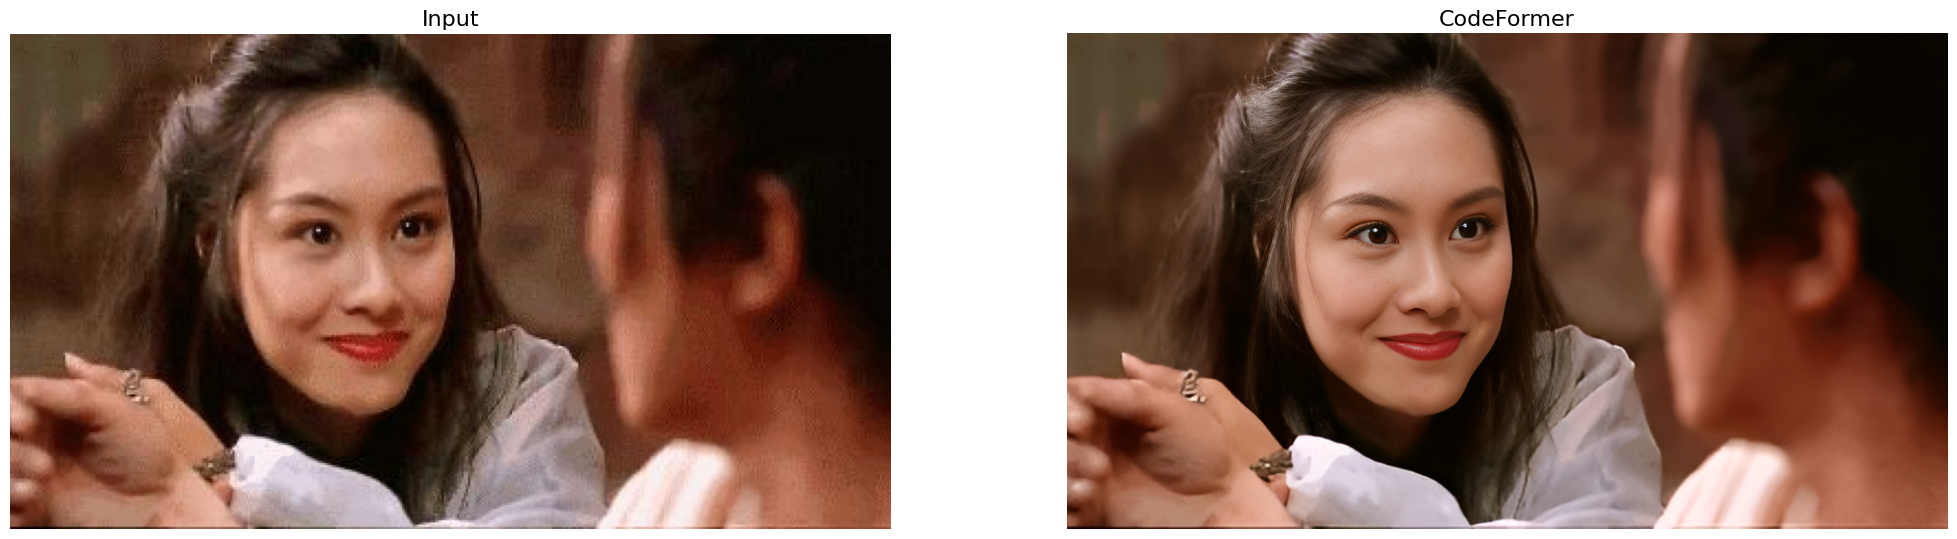

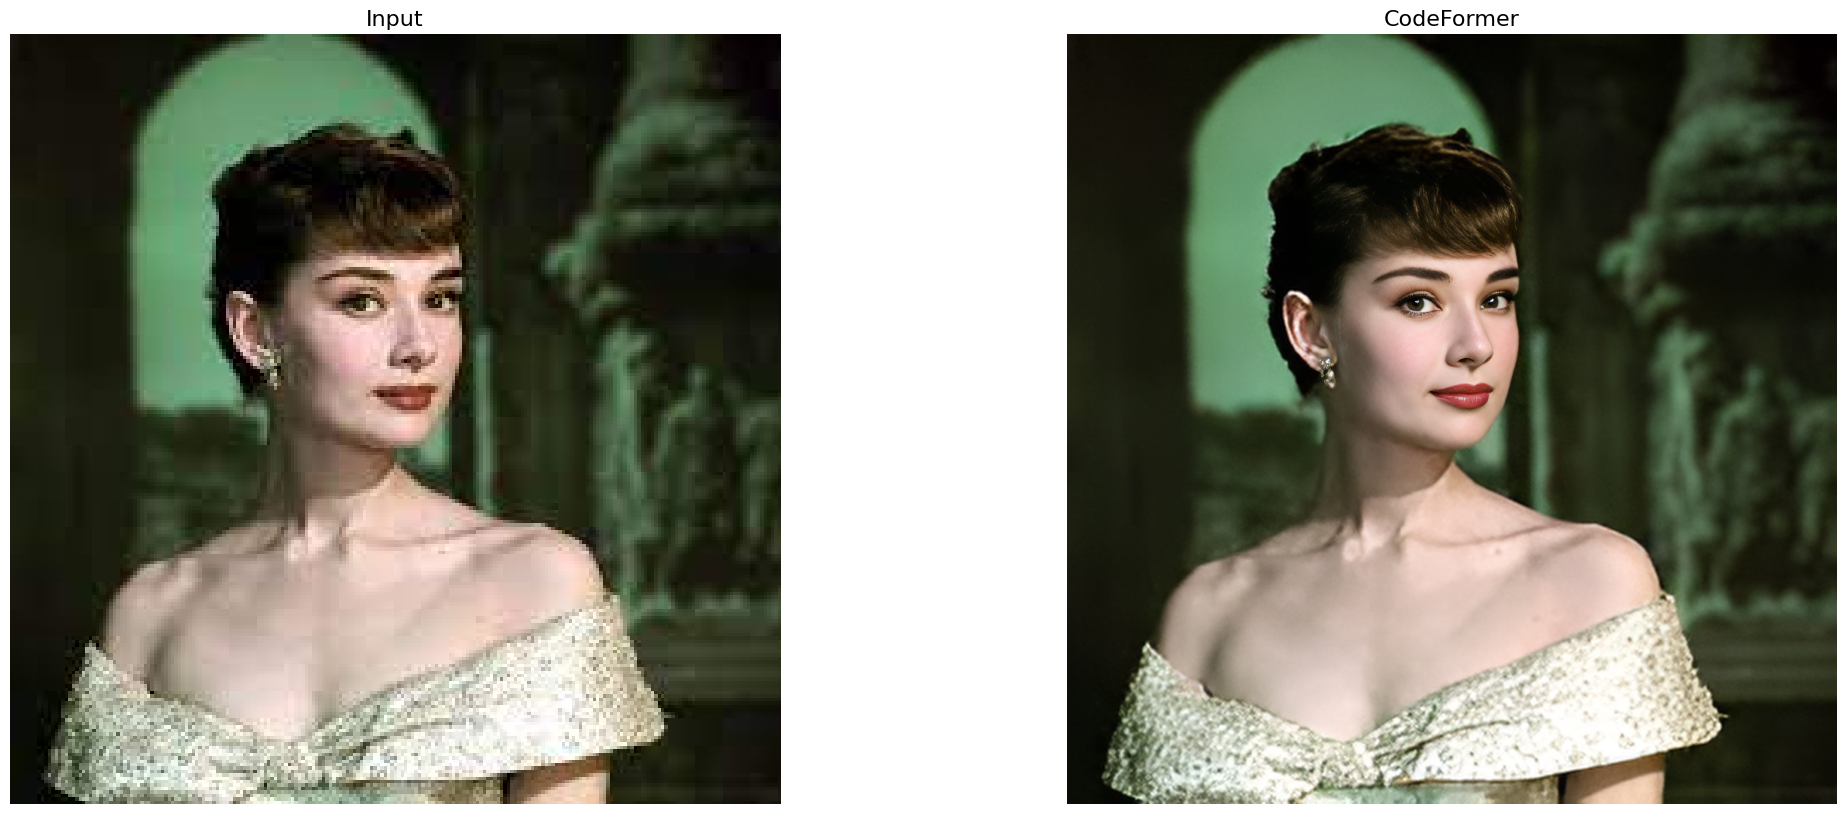

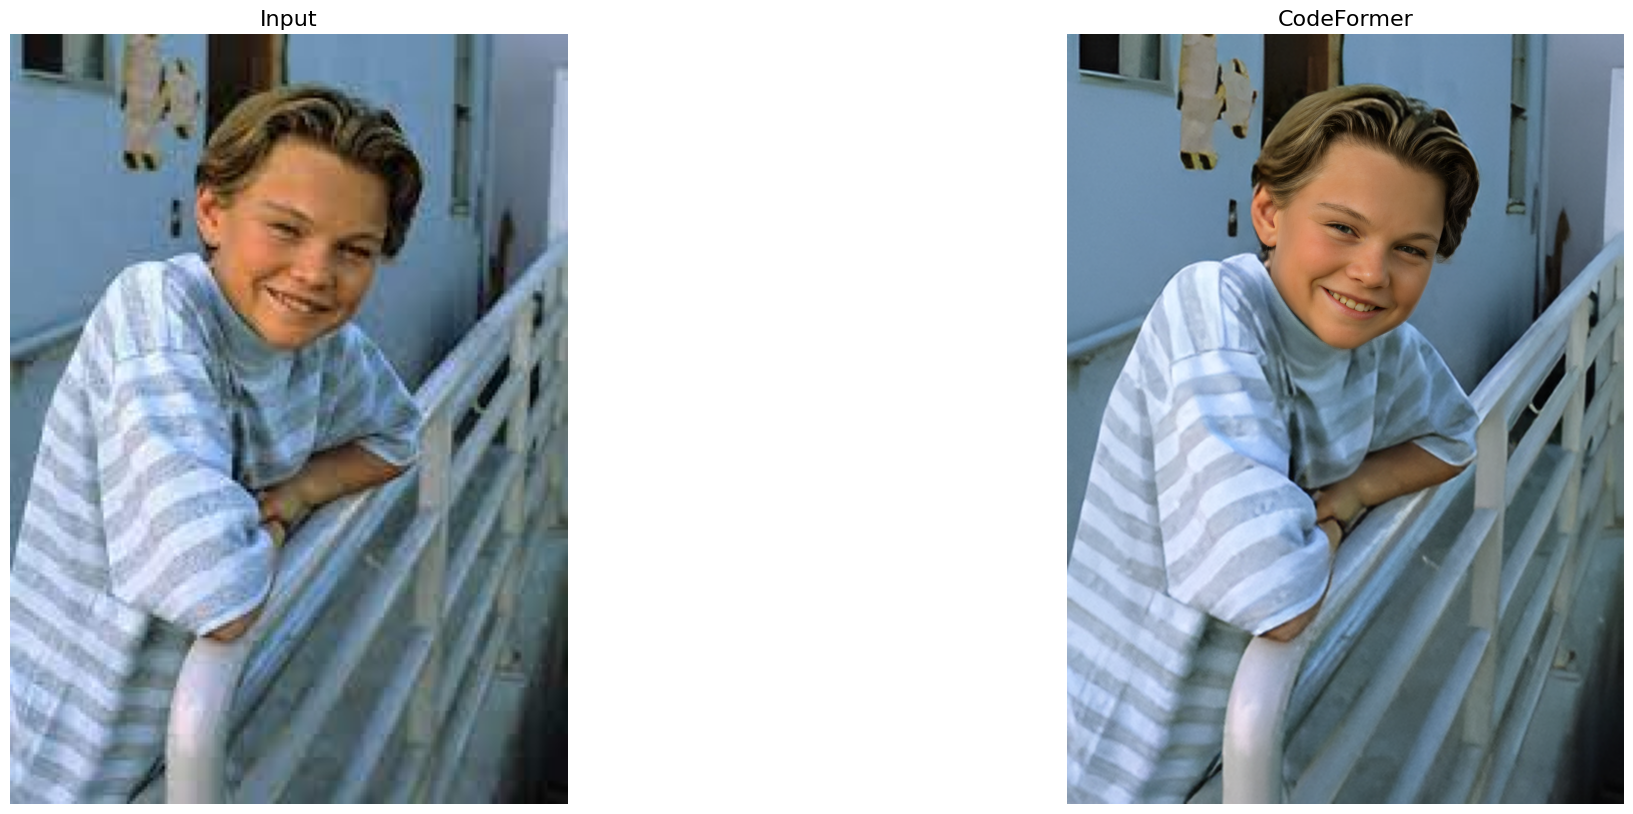

In [20]:
#@title Visualize the results { display-mode: "form" }

import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path)
  display(img_input, img_output)